#  Training Q-Learning agent on pong

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episode 1, Total Reward: -21.0
Episode 2, Total Reward: -21.0
Episode 3, Total Reward: -21.0
Episode 4, Total Reward: -20.0
Episode 5, Total Reward: -19.0
Episode 6, Total Reward: -20.0
Episode 7, Total Reward: -21.0
Episode 8, Total Reward: -20.0
Episode 9, Total Reward: -21.0
Episode 10, Total Reward: -20.0
Episode 11, Total Reward: -18.0
Episode 12, Total Reward: -20.0
Episode 13, Total Reward: -21.0
Episode 14, Total Reward: -21.0
Episode 15, Total Reward: -20.0
Episode 16, Total Reward: -21.0
Episode 17, Total Reward: -21.0
Episode 18, Total Reward: -20.0
Episode 19, Total Reward: -20.0
Episode 20, Total Reward: -19.0
Episode 21, Total Reward: -21.0
Episode 22, Total Reward: -20.0
Episode 23, Total Reward: -21.0
Episode 24, Total Reward: -21.0
Episode 25, Total Reward: -20.0
Episode 26, Total Reward: -20.0
Episode 27, Total Reward: -18.0
Episode 28, Total Reward: -20.0
Episode 29, Total Reward: -20.0
Episode 30, Total Reward: -18.0
Episode 31, Total Reward: -20.0
Episode 32, Total

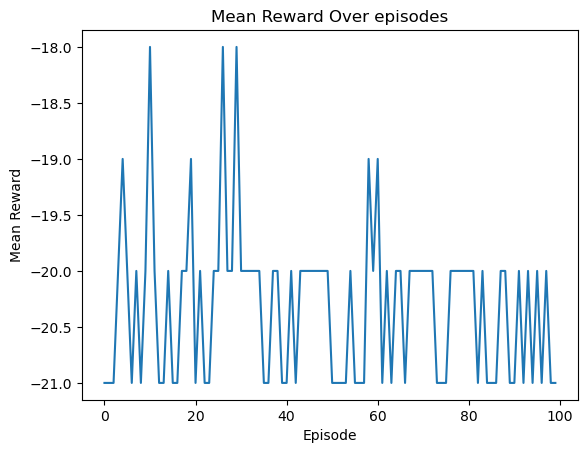

Total Reward: -1.0


In [4]:
import gym
import numpy as np
import matplotlib.pyplot as plt

env = gym.make('Pong-v4')

learning_rate = 0.01
discount_factor = 0.99
exploration_prob = 1.0  
exploration_decay = 0.995
min_exploration_prob = 0.1
num_episodes = 100

state_space_size = env.observation_space.shape
action_space_size = env.action_space.n
q_table = np.zeros((state_space_size[0], state_space_size[1], action_space_size))

mean_rewards = []

for episode in range(num_episodes):
    state_tuple = env.reset()
    total_reward = 0

    while True:
        state = state_tuple[0]

        state = state[:, :, np.newaxis] if state.ndim == 2 else state
        state_grayscale = np.mean(state, axis=-1, keepdims=True).astype(int)

        if np.random.rand() < exploration_prob:
            action = env.action_space.sample()  # Explore
        else:
            action = np.argmax(q_table[state_grayscale[:, :, 0], :])  # Exploit
            action = np.clip(action, 0, action_space_size - 1)

        step_res = env.step(action)
        next_state_tuple = step_res[0]
        reward = step_res[1]
        done = step_res[2]

        next_state = next_state_tuple[0]
        next_state = next_state[:, :, np.newaxis] if next_state.ndim == 2 else next_state
        next_state_grayscale = np.mean(next_state, axis=-1, keepdims=True).astype(int)

        q_table[state_grayscale[:, :, 0], action] = (
            1 - learning_rate
        ) * q_table[state_grayscale[:, :, 0], action] + learning_rate * (
            reward + discount_factor * np.max(q_table[next_state_grayscale[:, :, 0], :])
        )

        total_reward += reward
        state_tuple = next_state_tuple

        if done:
            break

    exploration_prob = max(min_exploration_prob, exploration_prob * exploration_decay)

    print(f"Episode {episode + 1}, Total Reward: {total_reward}")
    mean_rewards.append(total_reward)

plt.plot(mean_rewards)
plt.title('Mean Reward Over episodes')
plt.xlabel('Episode')
plt.ylabel('Mean Reward')
plt.show()

# Test the trained agent
total_reward = 0
state_tuple = env.reset()

while True:
    state = state_tuple[0]

    state = state[:, :, np.newaxis] if state.ndim == 2 else state
    state_grayscale = np.mean(state, axis=-1, keepdims=True).astype(int)
    action = np.argmax(q_table[state_grayscale[:, :, 0], :])
    action = np.clip(action, 0, action_space_size - 1)

    next_state_tuple = env.step(action)
    total_reward += reward

    if done:
        break

print(f"Total Reward: {total_reward}")

env.close()


#  Training Q-Learning agent on CartPole 

Episode 1, Total Reward: 8.0
Episode 2, Total Reward: 10.0
Episode 3, Total Reward: 9.0
Episode 4, Total Reward: 9.0
Episode 5, Total Reward: 9.0
Episode 6, Total Reward: 9.0
Episode 7, Total Reward: 10.0
Episode 8, Total Reward: 9.0
Episode 9, Total Reward: 9.0
Episode 10, Total Reward: 8.0
Episode 11, Total Reward: 12.0
Episode 12, Total Reward: 10.0
Episode 13, Total Reward: 9.0
Episode 14, Total Reward: 11.0
Episode 15, Total Reward: 10.0
Episode 16, Total Reward: 12.0
Episode 17, Total Reward: 10.0
Episode 18, Total Reward: 10.0
Episode 19, Total Reward: 9.0
Episode 20, Total Reward: 11.0
Episode 21, Total Reward: 11.0
Episode 22, Total Reward: 10.0
Episode 23, Total Reward: 9.0
Episode 24, Total Reward: 9.0
Episode 25, Total Reward: 12.0
Episode 26, Total Reward: 9.0
Episode 27, Total Reward: 9.0
Episode 28, Total Reward: 11.0
Episode 29, Total Reward: 10.0
Episode 30, Total Reward: 9.0
Episode 31, Total Reward: 10.0
Episode 32, Total Reward: 9.0
Episode 33, Total Reward: 8.0
Epi

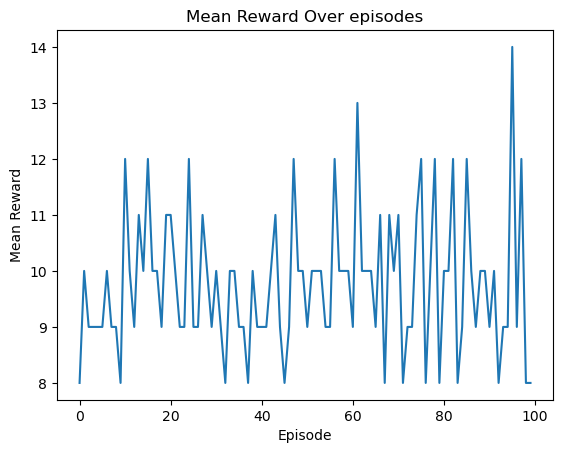

Total Reward: 10.0


In [5]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

def discretize_state(state):
    # Convert the continuous state to a discrete state (rounding)
    return tuple(map(int, state))

# Initialize the environment
env = gym.make('CartPole-v1',render_mode="rgb_array")

# Q-learning parameters
learning_rate = 0.1
discount_factor = 0.99
exploration_prob = 0.1
num_episodes = 100

# Initialize Q-table
state_space_size = env.observation_space.shape[0]
action_space_size = env.action_space.n
q_table = np.zeros((state_space_size, action_space_size))

mean_rewards = []

# Q-learning algorithm
for episode in range(num_episodes):
    state = env.reset()[0]
    total_reward = 0

    while True:
        # Choose action using epsilon-greedy strategy
        if np.random.rand() < exploration_prob:
            action = env.action_space.sample()  # Explore
        else:
            action = np.argmax(q_table[discretize_state(state), :])  # Exploit

        step_res = env.step(action)
        next_state = step_res[0]
        reward = step_res[1]
        done = step_res[2]
        
        next_state = discretize_state(next_state)

        # Update Q-value using the Q-learning update rule
        q_table[discretize_state(state), action] = (
            1 - learning_rate
        ) * q_table[discretize_state(state), action] + learning_rate * (
            reward + discount_factor * np.max(q_table[next_state, :])
        )

        total_reward += reward
        state = next_state

        if done:
            break

    # Print the total reward for this episode
    print(f"Episode {episode + 1}, Total Reward: {total_reward}")

    # mean rewards over episodes
    mean_rewards.append(total_reward)

# Plotting mean rewards over episodes
plt.plot(mean_rewards)
plt.title('Mean Reward Over episodes')
plt.xlabel('Episode')
plt.ylabel('Mean Reward')
plt.show()

# Test the trained agent
total_reward = 0
state = env.reset()[0]  

while True:
    action = np.argmax(q_table[discretize_state(state), :])
    
    step_res = env.step(action)
    next_state = step_res[0]
    reward = step_res[1]
    done = step_res[2]
    
    next_state = discretize_state(next_state)

    total_reward += reward
    env.render()

    if done:
        break

print(f"Total Reward: {total_reward}")


env.close()


Training PPO agent on Atari CartPole

Episode 0, Total Reward: 25.0
Episode 1, Total Reward: 11.0
Episode 2, Total Reward: 21.0
Episode 3, Total Reward: 11.0
Episode 4, Total Reward: 12.0
Episode 5, Total Reward: 23.0
Episode 6, Total Reward: 23.0
Episode 7, Total Reward: 16.0
Episode 8, Total Reward: 19.0
Episode 9, Total Reward: 44.0
Episode 10, Total Reward: 33.0
Episode 11, Total Reward: 45.0
Episode 12, Total Reward: 36.0
Episode 13, Total Reward: 31.0
Episode 14, Total Reward: 80.0
Episode 15, Total Reward: 51.0
Episode 16, Total Reward: 30.0
Episode 17, Total Reward: 20.0
Episode 18, Total Reward: 17.0
Episode 19, Total Reward: 19.0
Episode 20, Total Reward: 18.0
Episode 21, Total Reward: 80.0
Episode 22, Total Reward: 15.0
Episode 23, Total Reward: 75.0
Episode 24, Total Reward: 33.0
Episode 25, Total Reward: 27.0
Episode 26, Total Reward: 47.0
Episode 27, Total Reward: 15.0
Episode 28, Total Reward: 17.0
Episode 29, Total Reward: 44.0
Episode 30, Total Reward: 51.0
Episode 31, Total Reward: 23.0
Episode 32, Total 

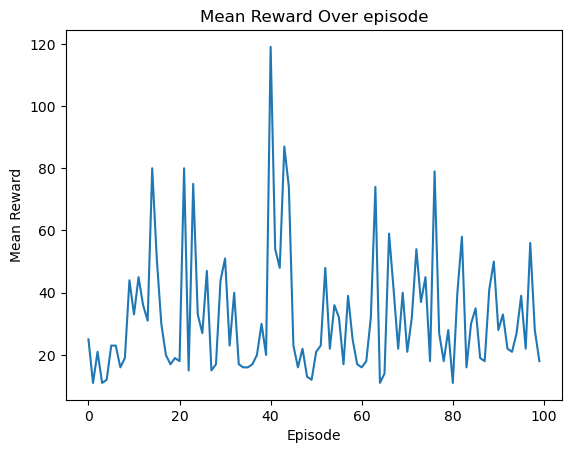

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import gymnasium as gym
import matplotlib.pyplot as plt

# Define a simple neural network for the policy and value functions
class PolicyValueNet(nn.Module):
    def __init__(self, obs_size, action_size):
        super(PolicyValueNet, self).__init__()
        self.fc1 = nn.Linear(obs_size, 64)
        self.fc2 = nn.Linear(64, action_size)
        self.fc_value = nn.Linear(64, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        logits = self.fc2(x)
        value = self.fc_value(x)
        return logits, value

# Proximal Policy Optimization algorithm
class PPO:
    def __init__(self, obs_size, action_size, lr=1e-3, gamma=0.99, clip_param=0.2, value_loss_coef=0.5, entropy_coef=0.01):
        self.policy_value_net = PolicyValueNet(obs_size, action_size)
        self.optimizer = optim.Adam(self.policy_value_net.parameters(), lr=lr)
        self.gamma = gamma
        self.clip_param = clip_param
        self.value_loss_coef = value_loss_coef
        self.entropy_coef = entropy_coef

    def compute_returns(self, rewards):
        returns = []
        R = 0
        for r in reversed(rewards):
            R = r + self.gamma * R
            returns.insert(0, R)
        returns = torch.tensor(returns, dtype=torch.float32)
        returns = (returns - returns.mean()) / (returns.std() + 1e-8)
        return returns

    def update_policy(self, states, actions, old_probs, returns, advantages):
        logits, values = self.policy_value_net(states)

        # Calculate advantages and returns
        advantages = (advantages - advantages.mean()) / (advantages.std() + 1e-8)
        returns = (returns - returns.mean()) / (returns.std() + 1e-8)

        # Calculate policy loss
        new_probs = F.softmax(logits, dim=-1)
        action_masks = F.one_hot(actions, num_classes=new_probs.shape[-1])
        selected_probs = torch.sum(new_probs * action_masks, dim=-1)
        old_probs = old_probs.clamp(min=1e-8)
        ratio = selected_probs / old_probs
        surr1 = ratio * advantages
        surr2 = torch.clamp(ratio, 1 - self.clip_param, 1 + self.clip_param) * advantages
        policy_loss = -torch.min(surr1, surr2).mean()

        # Calculate value loss
        value_loss = F.mse_loss(values.squeeze(), returns)

        # Calculate entropy loss
        entropy_loss = -(new_probs * torch.log(new_probs + 1e-8)).sum(dim=-1).mean()

        # Total loss
        loss = policy_loss + self.value_loss_coef * value_loss - self.entropy_coef * entropy_loss

        # Update the model
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

# Training loop
def train_ppo(env_name, num_episodes):
    env = gym.make(env_name)
    obs_size = env.observation_space.shape[0]
    action_size = env.action_space.n

    ppo_agent = PPO(obs_size, action_size)
    
    mean_rewards = []
    
    for episode in range(num_episodes):
        state = env.reset()[0]
        done = False
        episode_states = []
        episode_actions = []
        episode_rewards = []
        episode_probs = []

        while not done:
            state = torch.tensor(state, dtype=torch.float32)
            logits, value = ppo_agent.policy_value_net(state)
            probs = F.softmax(logits, dim=-1)
            action = torch.multinomial(probs, 1).item()

            episode_states.append(state)
            episode_actions.append(action)
            episode_probs.append(probs[action].item())

            stepres = env.step(action)
            state = stepres[0]
            reward = stepres[1]
            done = stepres[2]
            episode_rewards.append(reward)
            
        returns = ppo_agent.compute_returns(episode_rewards)
        advantages = returns - value.item()

        states_tensor = torch.stack(episode_states)
        actions_tensor = torch.tensor(episode_actions, dtype=torch.long)
        old_probs_tensor = torch.tensor(episode_probs, dtype=torch.float32)

        ppo_agent.update_policy(states_tensor, actions_tensor, old_probs_tensor, returns, advantages)

        mean_reward = sum(episode_rewards)
        mean_rewards.append(mean_reward)
        
        if episode % 1 == 0:
            print(f"Episode {episode}, Total Reward: {sum(episode_rewards)}")

    env.close()
    # Plotting
    plt.plot(mean_rewards)
    plt.title('Mean Reward Over episode')
    plt.xlabel('Episode')
    plt.ylabel('Mean Reward')
    plt.show()
    

train_ppo('CartPole-v1', num_episodes=100)


training on pong

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import gym
import matplotlib.pyplot as plt
import torchvision.transforms as T

# Resize and normalize the input frames
preprocess = T.Compose([T.ToPILImage(), T.Resize(40), T.Grayscale(num_output_channels=1), T.ToTensor()])


import torch
import torch.nn as nn
import torch.nn.functional as F

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class PolicyValueNet(nn.Module):
    def __init__(self):
        super(PolicyValueNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=8, stride=4)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=4, stride=2)
        self.conv3 = nn.Conv2d(64, 64, kernel_size=3, stride=1)
        self.fc1 = nn.Linear(64 * 3 * 3, 512)
        self.fc2 = nn.Linear(512, 3)  

    def forward(self, x):
        x = self._forward_conv(x)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        logits = self.fc2(x)
        return logits

    def _forward_conv(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        return x

class PPO:
    def __init__(self, lr=1e-3, gamma=0.99, clip_param=0.2, value_loss_coef=0.5, entropy_coef=0.01):
        self.policy_value_net = PolicyValueNet()
        self.optimizer = optim.Adam(self.policy_value_net.parameters(), lr=lr)
        self.gamma = gamma
        self.clip_param = clip_param
        self.value_loss_coef = value_loss_coef
        self.entropy_coef = entropy_coef

# Usage
net = PolicyValueNet()
# Move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net.to(device)
    
# Proximal Policy Optimization algorithm
class PPO:
    def __init__(self, obs_size, action_size, lr=1e-3, gamma=0.99, clip_param=0.2, value_loss_coef=0.5, entropy_coef=0.01):
        self.policy_value_net = PolicyValueNet()
        self.optimizer = optim.Adam(self.policy_value_net.parameters(), lr=lr)
        self.gamma = gamma
        self.clip_param = clip_param
        self.value_loss_coef = value_loss_coef
        self.entropy_coef = entropy_coef

    def compute_returns(self, rewards):
        returns = []
        R = 0
        for r in reversed(rewards):
            R = r + self.gamma * R
            returns.insert(0, R)
        returns = torch.tensor(returns, dtype=torch.float32)
        returns = (returns - returns.mean()) / (returns.std() + 1e-8)
        return returns

    def update_policy(self, states, actions, old_probs, returns, advantages):
        logits, values = self.policy_value_net(states)

        # Calculate advantages and returns
        advantages = (advantages - advantages.mean()) / (advantages.std() + 1e-8)
        returns = (returns - returns.mean()) / (returns.std() + 1e-8)

        # Calculate policy loss
        new_probs = F.softmax(logits, dim=-1)
        action_masks = F.one_hot(actions, num_classes=new_probs.shape[-1])
        selected_probs = torch.sum(new_probs * action_masks, dim=-1)
        old_probs = old_probs.clamp(min=1e-8)
        ratio = selected_probs / old_probs
        surr1 = ratio * advantages
        surr2 = torch.clamp(ratio, 1 - self.clip_param, 1 + self.clip_param) * advantages
        policy_loss = -torch.min(surr1, surr2).mean()

        # Calculate value loss
        value_loss = F.mse_loss(values.squeeze(), returns)

        # Calculate entropy loss
        entropy_loss = -(new_probs * torch.log(new_probs + 1e-8)).sum(dim=-1).mean()

        # Total loss
        loss = policy_loss + self.value_loss_coef * value_loss - self.entropy_coef * entropy_loss

        # Update the model
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

# Training loop
def train_ppo(env_name, num_episodes):
    env = gym.make(env_name)
    print(env.observation_space.shape)
    obs_size = env.observation_space.shape[:2]  

    action_size = env.action_space.n

    ppo_agent = PPO(obs_size, action_size, lr=1e-4)  
    
    mean_rewards = []
    
    for episode in range(num_episodes):
        state = env.reset()[0]
        state = preprocess(state) 
        done = False
        episode_states = []
        episode_actions = []
        episode_rewards = []
        episode_probs = []

        while not done:
            state = torch.tensor(state, dtype=torch.float32)
            logits, value = ppo_agent.policy_value_net(state)
            probs = F.softmax(logits, dim=-1)
            action = torch.multinomial(probs, 1).item()

            episode_states.append(state)
            episode_actions.append(action)
            episode_probs.append(probs[0, action].item())

            stepres = env.step(action)
            next_state = preprocess(stepres[0]).unsqueeze(0)  
            reward = stepres[1]
            done = stepres[2]
            episode_rewards.append(reward)
            
            state = next_state

        returns = ppo_agent.compute_returns(episode_rewards)
        advantages = returns - value.item()

        states_tensor = torch.cat(episode_states)
        actions_tensor = torch.tensor(episode_actions, dtype=torch.long)
        old_probs_tensor = torch.tensor(episode_probs, dtype=torch.float32)

        ppo_agent.update_policy(states_tensor, actions_tensor, old_probs_tensor, returns, advantages)

        mean_reward = sum(episode_rewards)
        mean_rewards.append(mean_reward)
        
        if episode % 10 == 0:
            print(f"Episode {episode}, Total Reward: {sum(episode_rewards)}")

    env.close()
    # Plotting
    plt.plot(mean_rewards)
    plt.title('Mean Reward Over episode')
    plt.xlabel('Episode')
    plt.ylabel('Mean Reward')
    plt.show()

# Train PPO on Pong-v4
train_ppo('Pong-v4', num_episodes=1000)